In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
import pyARCiS

In [2]:
# initialize ARCiS from input file input.dat, store output in <output>
# the third argument with commandline options is optional
pyARCiS.pyinit('Retrieval.in','output')

Output dir: output/
         ARtful modelling code for exoplanet Science - ARCiS
By using ARCiS you agree to the terms of use.
It basically means you offer us co-author rights on any paper
that uses results computed with ARCiS.
Let's get the show on the road!!
ARCiS version 
input file: Retrieval.in
Number of molecules:         10                
Number of clouds:             0                
Number of collision pairs:    2                
Number of observations:       1                
 WASP-017b
Stellar mass:      1.2860           Msun
Stellar T:      6550.0000           K
Stellar radius:    1.5830           Rsun
Stellar logg:      4.1490           
Metallicity:      -0.2500           
Planet orbit:    0.0513             AU
Planet radius:     1.9320           Rjup
Planet mass:       0.4770           Mjup
Mass uncert.:      0.0467           Mjup
Blackbody T:    1753.4049           K
Orbital period:    3.7350           days
keyword 'compute' no longer supported
Planet logg:    2.520  

0.0 2990.450725274072
1.0 4331.492843994479
2.0 429.8564520877013
3.0 1952.1819390100407


<ErrorbarContainer object of 3 artists>

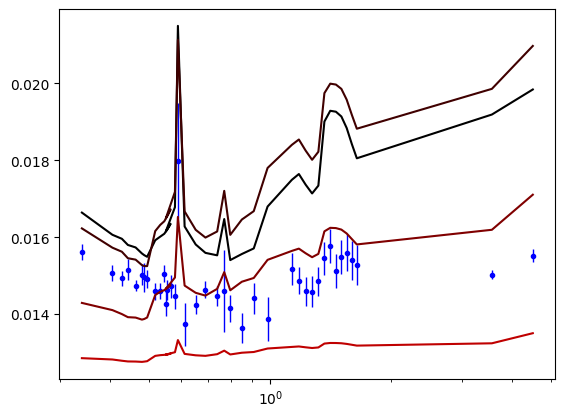

In [3]:
pyARCiS.pysetvalue('Rp',1.75)
for i in range(0,4):
    Z=float(i)
# pysetvalue sets a keyword using a string and a float (key and value)
    pyARCiS.pysetvalue('metallicity',Z)
# pycomputemodel computes a model using the current setup
    pyARCiS.pycomputemodel()
    plt.xscale('log')
    plt.plot(pyARCiS.pyex.pyobs[0], pyARCiS.pyex.pyobs[3], color=(i/4,0,0),zorder=200)
    chi2=np.sum((pyARCiS.pyex.pyobs[1][:]-pyARCiS.pyex.pyobs[3][:])**2/pyARCiS.pyex.pyobs[2][:]**2)
    print(Z,chi2)

plt.errorbar(pyARCiS.pyex.pyobs[0],pyARCiS.pyex.pyobs[1],yerr=pyARCiS.pyex.pyobs[2],linewidth=0,elinewidth=1,marker='.',color=(0,0,1),zorder=100)
# the exchange module pyex contains:
# pylam: the wavelength grid in micron
# pytrans: the transit spectrum
# pyemis: the emission spectrum at the predefined number of phases pyemis[0:nphase-1][0:nlam-1] in Jy
# pyp: the pressure grid
# pyt: the temperature grid

# pyobs: array containing all observation data read in.
#        pyobs[0][:] contains the wavelength
#        pyobs[1][:] contains the data 
#        pyobs[2][:] contains the errors
#        pyobs[3][:] contains the computed model output
# pynvars: the number of retrieval parameters in the input file
# note that you can ofcourse run a retrieval completely within python if you like without using any of the ARCiS
# intrinsic retrieval parameters setup in the input file